In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
data_2d = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/data6/data_2d.csv')

In [34]:
# Припустимо, що колонка "A" - це клас, а "B" і "C" - це ознаки.
features_2d = data_2d.iloc[:, [1, 2]]

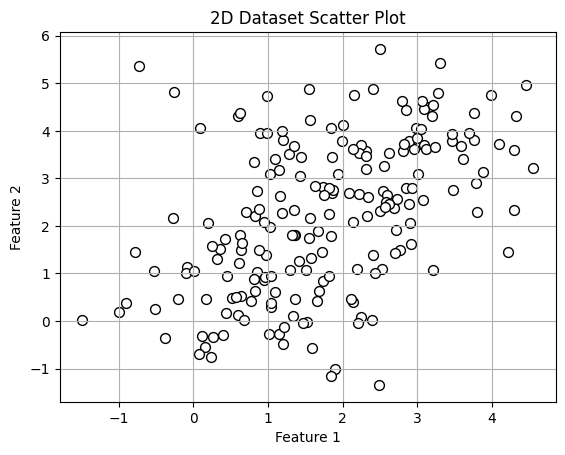

In [35]:
plt.scatter(
    features_2d.iloc[:, 0], features_2d.iloc[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50
)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Dataset Scatter Plot')
plt.grid(True)
plt.show()

In [18]:
# Стандартизація даних для кращої роботи K-means
scaler = StandardScaler()
features_2d_scaled = scaler.fit_transform(features_2d)

In [19]:
# Метод ліктя для визначення оптимальної кількості кластерів
inertia_2d = []
for k in range(1, 11):
    kmeans_2d = KMeans(n_clusters=k, random_state=42)
    kmeans_2d.fit(features_2d_scaled)
    inertia_2d.append(kmeans_2d.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

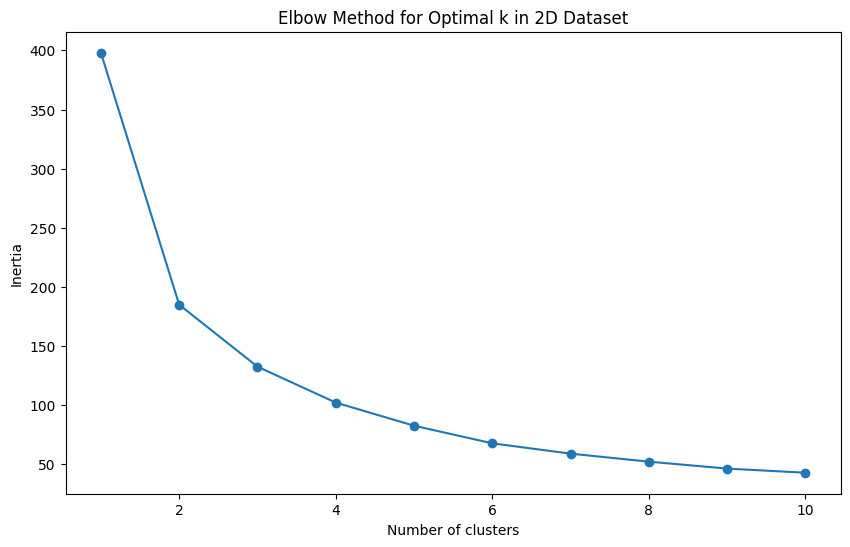

In [20]:
# Візуалізація результату
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_2d, marker='o')
plt.title('Elbow Method for Optimal k in 2D Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-40-efb075c1491d>:18: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


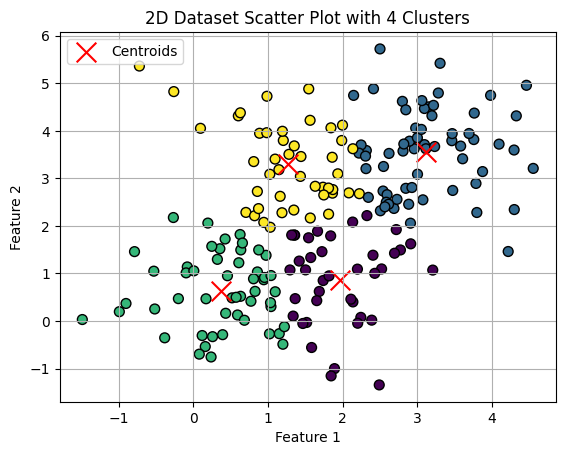

In [40]:
# Тренуємо модель K-means на стандартизованих даних
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_2d_scaled)

cluster_labels = kmeans.labels_

# Побудова діаграми розсіювання з розфарбованими кластерами
plt.scatter(
    features_2d.iloc[:, 0], features_2d.iloc[:, 1],
    c=cluster_labels,
    edgecolor='black',
    marker='o',
    s=50
)

# Відображаємо центроїди кластерів
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    marker='x',
    s=200,
    c='red',
    edgecolor='black',
    label='Centroids'
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Dataset Scatter Plot with 4 Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
data_mnist = pd.read_csv('/content/gdrive/MyDrive/Colab_Notebooks/data6/mnist.csv')

In [57]:
# Проводимо кластеризацію K-means і використовуємо ліктевий метод
inertia_mnist = []
for k in range(1, 11):
    kmeans_mnist = KMeans(n_clusters=k)
    kmeans_mnist.fit(data_mnist)
    inertia_mnist.append(kmeans_mnist.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

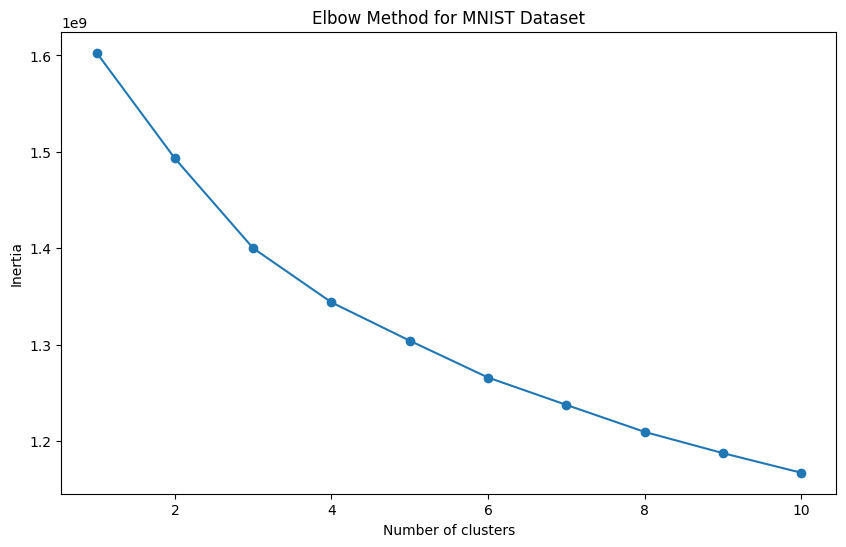

In [58]:
# Візуалізуємо результати ліктевого методу для MNIST датасету
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_mnist, marker='o')
plt.title('Elbow Method for MNIST Dataset')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Мітки збережені у першій колонці датафрейму
mnist_labels = data_mnist.iloc[:, 0].values
mnist_pixels = data_mnist.iloc[:, 1:].values

In [64]:
pca = PCA(n_components=2)
mnist_pixels_reduced = pca.fit_transform(mnist_pixels)

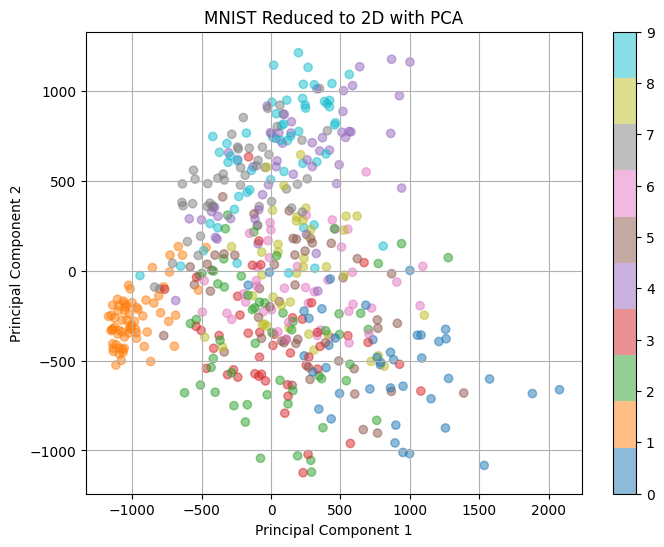

In [65]:
# Візуалізація зменшених до двох вимірів даних
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mnist_pixels_reduced[:, 0], mnist_pixels_reduced[:, 1], c=mnist_labels, cmap='tab10', alpha=0.5)
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('MNIST Reduced to 2D with PCA')
plt.grid(True)
plt.show()